<a href="https://colab.research.google.com/github/anushka-dere/forecasting/blob/main/Problem_statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
df=pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [ ]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


Visualization

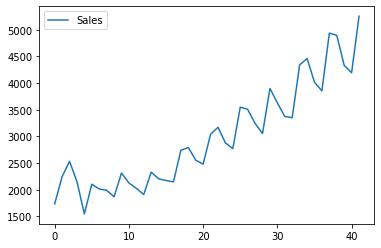

In [ ]:
df.plot()

In [ ]:
import seaborn as sns

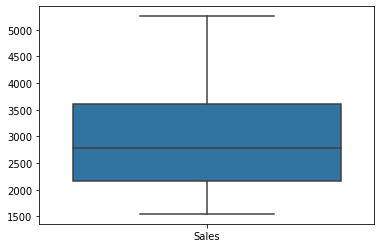

In [ ]:
sns.boxplot(data = df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac0474ca90>]],
      dtype=object)

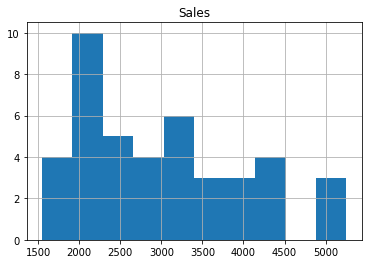

In [ ]:
df.hist()

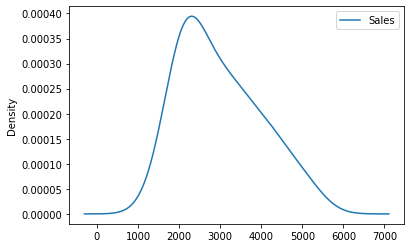

In [ ]:
df.plot(kind='kde')

In [ ]:
np.array(df['Sales'])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


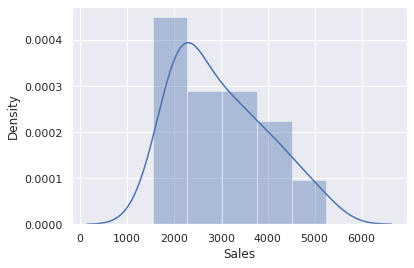

In [ ]:
sns.set_theme()
rk = sns.distplot(df['Sales'],kde=True)

In [ ]:
from pandas.plotting import lag_plot

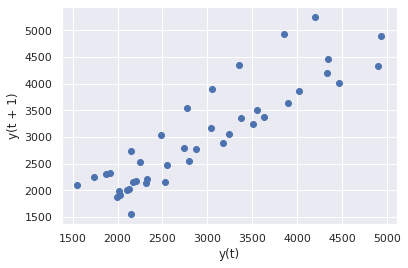

In [ ]:
lag_plot(df['Sales'])

Data preprocessing

In [ ]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [ ]:
len(df)

42

In [ ]:
df['quarter'] = 0
for i in range(42):
    p=df['Quarter'][i]
    df['quarter'][i]=p[0:2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [ ]:
df['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [ ]:
df_dummies=pd.DataFrame(pd.get_dummies(df['quarter']),columns=['Q1','Q2','Q3','Q4'])
df_dummies

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [ ]:
cc=pd.concat([df,df_dummies],axis=1)
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [ ]:
df

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [ ]:
cc['t']=np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc['sales_log'] = np.log(df['Sales'])

In [ ]:
cc['t']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
40    41
41    42
Name: t, dtype: int64

In [ ]:
cc['t_squared']

0        1
1        4
2        9
3       16
4       25
5       36
6       49
7       64
8       81
9      100
10     121
11     144
12     169
13     196
14     225
15     256
16     289
17     324
18     361
19     400
20     441
21     484
22     529
23     576
24     625
25     676
26     729
27     784
28     841
29     900
30     961
31    1024
32    1089
33    1156
34    1225
35    1296
36    1369
37    1444
38    1521
39    1600
40    1681
41    1764
Name: t_squared, dtype: int64

In [ ]:
cc['sales_log']

0     7.458663
1     7.716443
2     7.837477
3     7.675529
4     7.344602
5     7.651791
6     7.608058
7     7.596767
8     7.533186
9     7.746574
10    7.663088
11    7.614228
12    7.555175
13    7.754123
14    7.699185
15    7.684309
16    7.672422
17    7.915461
18    7.934783
19    7.846203
20    7.816407
21    8.019456
22    8.062154
23    7.965199
24    7.927324
25    8.174703
26    8.162801
27    8.084519
28    8.024862
29    8.268475
30    8.196712
31    8.123558
32    8.117312
33    8.376090
34    8.403128
35    8.298291
36    8.256867
37    8.504311
38    8.495970
39    8.374015
40    8.341410
41    8.566555
Name: sales_log, dtype: float64

In [ ]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [ ]:
train = cc.head(32)
train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [ ]:
test=cc.tail(10)
test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,sales_log
32,Q1_94,3352.0,Q1,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


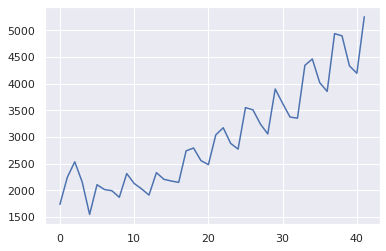

In [ ]:
df['Sales'].plot()

Model

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
linear_model = smf.ols("Sales~t",data=train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse = np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767116

In [ ]:
quad_model = smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse = np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.735735540752

In [ ]:
exp_model = smf.ols("sales_log~t",data=train).fit()
exp_pred = pd.Series(exp_model.predict(test['t']))
exp_rmse = np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [ ]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


Using ARIMA model

In [ ]:
data= pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx", header=0,index_col=0, parse_dates=True)
data

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [ ]:
split_point = len(data) - 7
dataset_cc, validation_cc = data[0:split_point],data[split_point:]
print('dataset_cc %d, validation_cc %d' % (len(dataset_cc), len(validation_cc)))

dataset_cc 35, validation_cc 7


In [ ]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [ ]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
train = read_csv('dataset_cc.csv', header = None, index_col=0, parse_dates= True, squeeze=True)
train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Name: 1, dtype: float64

In [ ]:
x = train.values
x = x.astype('float32')
train_size = int(len(x) * 0.50)
train, test = x[0:train_size], x[train_size:]

In [ ]:
x

array([1734.827 , 2244.961 , 2533.805 , 2154.963 , 1547.819 , 2104.412 ,
       2014.363 , 1991.747 , 1869.05  , 2313.632 , 2128.32  , 2026.829 ,
       1910.604 , 2331.165 , 2206.55  , 2173.968 , 2148.278 , 2739.308 ,
       2792.754 , 2556.01  , 2480.9739, 3039.523 , 3172.116 , 2879.001 ,
       2772.    , 3550.    , 3508.    , 3243.86  , 3056.    , 3899.    ,
       3629.    , 3373.    , 3352.    , 4342.    , 4461.    ],
      dtype=float32)

In [ ]:
train_size

17

Validation

In [ ]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
RMSE: 434.401


In [ ]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","RMSE_ARIMA"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,RMSE_ARIMA,434.400665
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


In [ ]:
## the least RMSE values has the RMSE_ARMIA model and we can final this model

Airline model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel("/content/Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
data.shape

(96, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data= data.set_index(['Month'])

In [ ]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


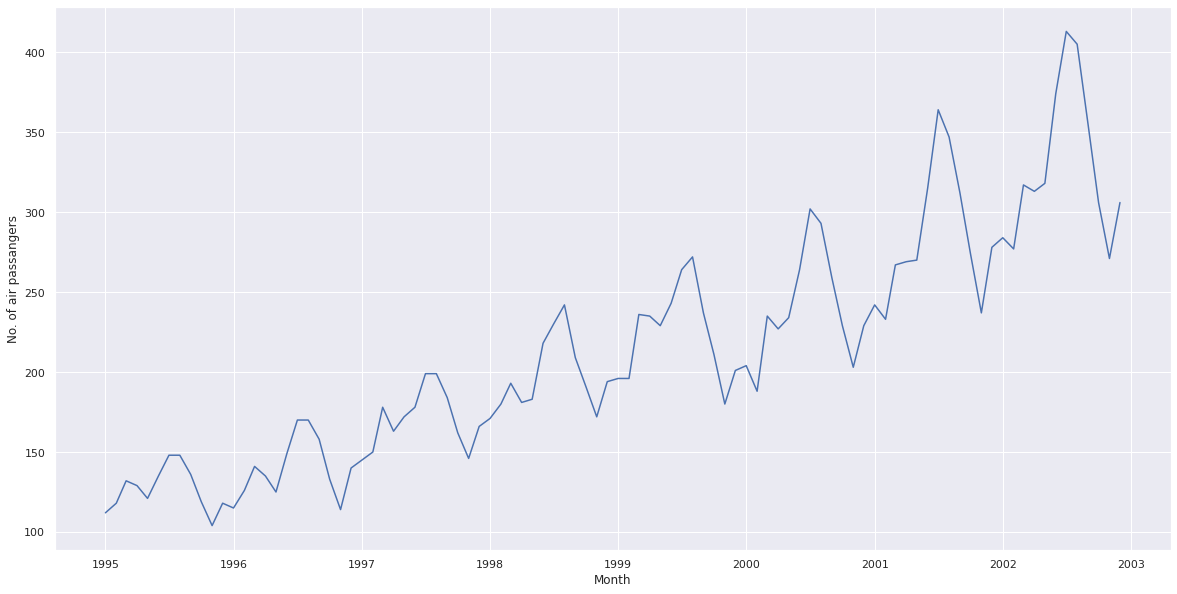

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('Month')
plt.ylabel('No. of air passangers')
plt.plot(data)

In [ ]:
rolmean= data.rolling(window=12).mean()
rolstd= data.rolling(window=12).std()

In [ ]:
rolmean

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN
...,...
2002-08-01,316.833333
2002-09-01,320.416667
2002-10-01,323.083333


In [ ]:
rolstd

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN
...,...
2002-08-01,54.530781
2002-09-01,55.586883
2002-10-01,53.899668


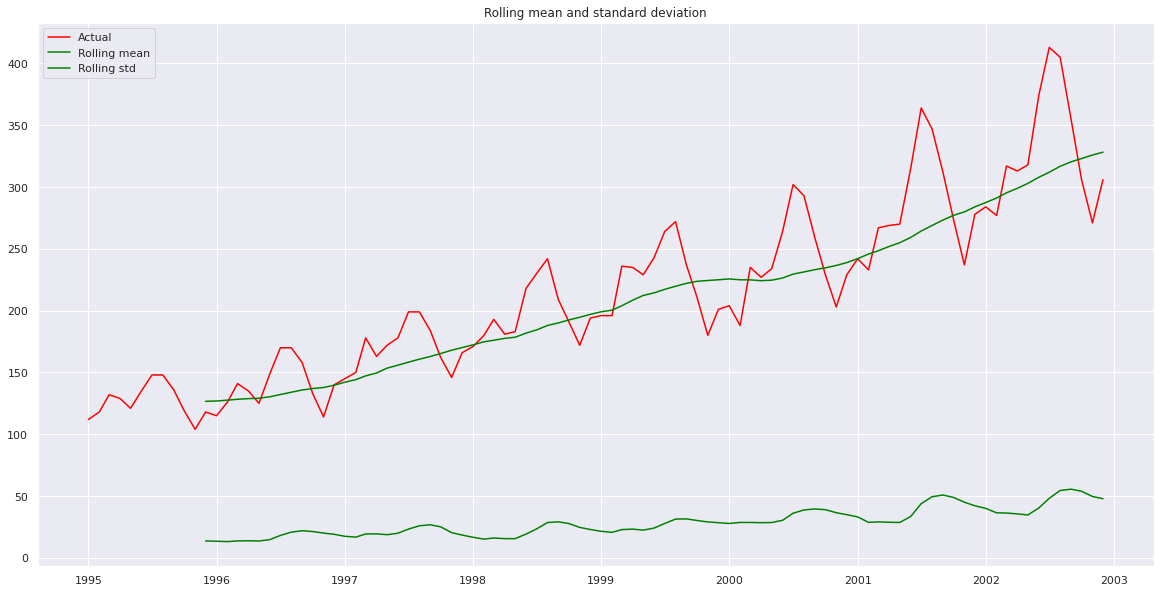

In [ ]:
plt.figure(figsize=(20,10))
actual= plt.plot(data, color='red',label='Actual')
mean_6= plt.plot(rolmean, color='green',label='Rolling mean')
std_6 = plt.plot(rolstd, color='green',label= 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
print('Dickey-fuller test: ')
dftest=adfuller(data['Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-fuller test: 
Test Statistic           1.340248
p-value                  0.996825
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


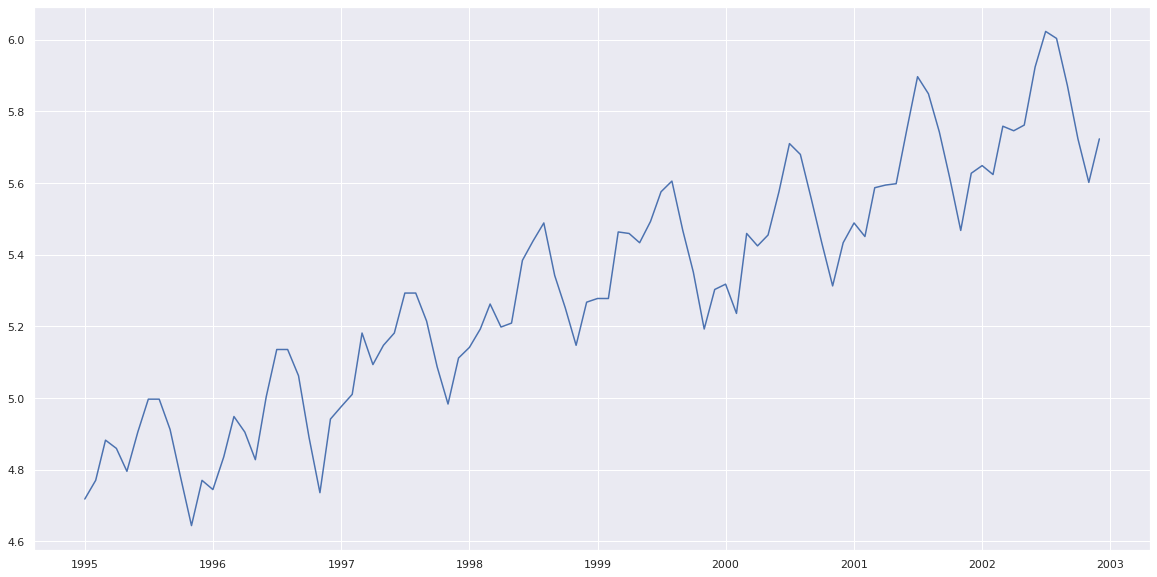

In [ ]:
plt.figure(figsize=(20,10))
data_log= np.log(data)
plt.plot(data_log)

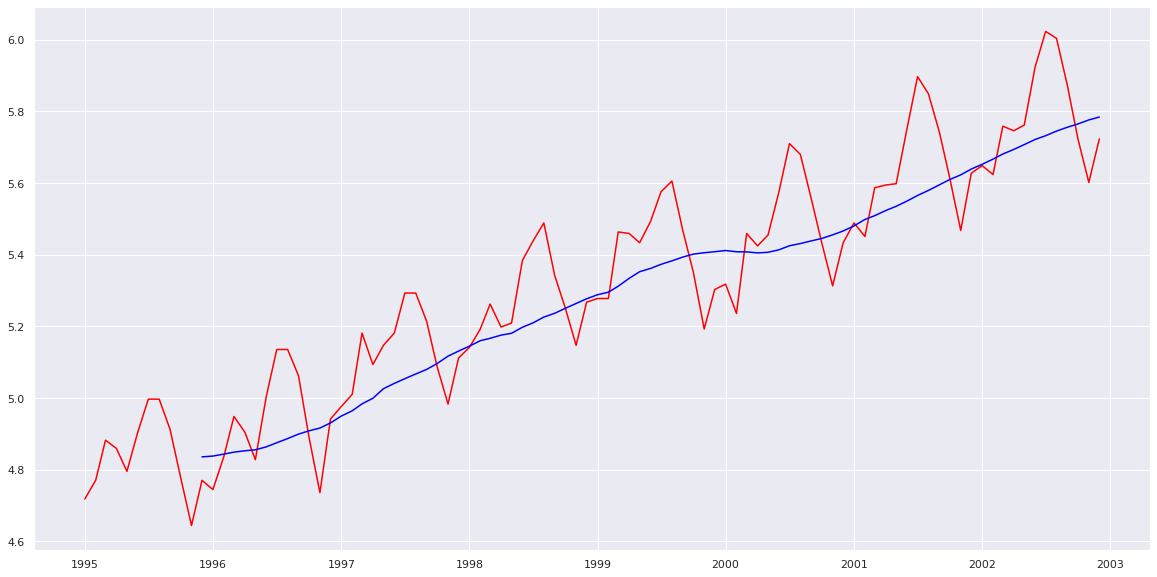

In [ ]:
plt.figure(figsize=(20,10))
mavg = data_log.rolling(window=12).mean()
mstd = data_log.rolling(window=12).std()
plt.plot(data_log, color='red')
plt.plot(mavg, color='blue')

In [ ]:
data_log_diff=data_log-mavg
data_log_diff

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN
...,...
2002-08-01,0.258591
2002-09-01,0.116062
2002-10-01,-0.041675


In [ ]:
data_log_diff=data_log_diff.dropna()
data_log_diff

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142
...,...
2002-08-01,0.258591
2002-09-01,0.116062
2002-10-01,-0.041675


In [ ]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

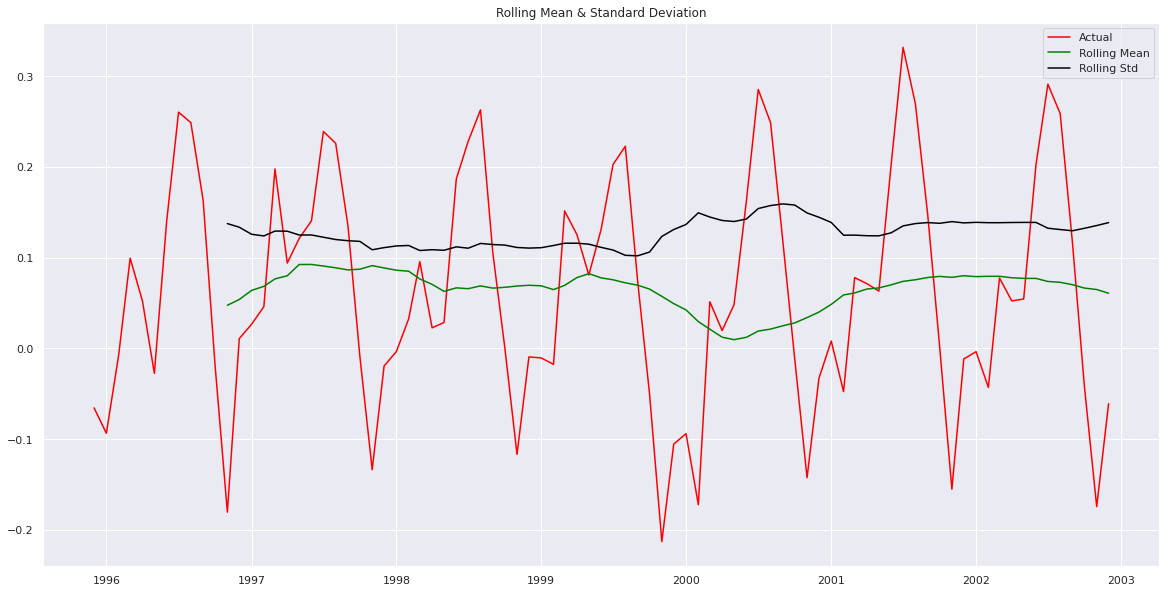

Dickey-Fuller Test: 
Test Statistic          -1.910930
p-value                  0.326937
Lags Used               12.000000
No. of Obs              72.000000
Critical Value (1%)     -3.524624
Critical Value (5%)     -2.902607
Critical Value (10%)    -2.588679
dtype: float64


In [ ]:
stationarity(data_log_diff)

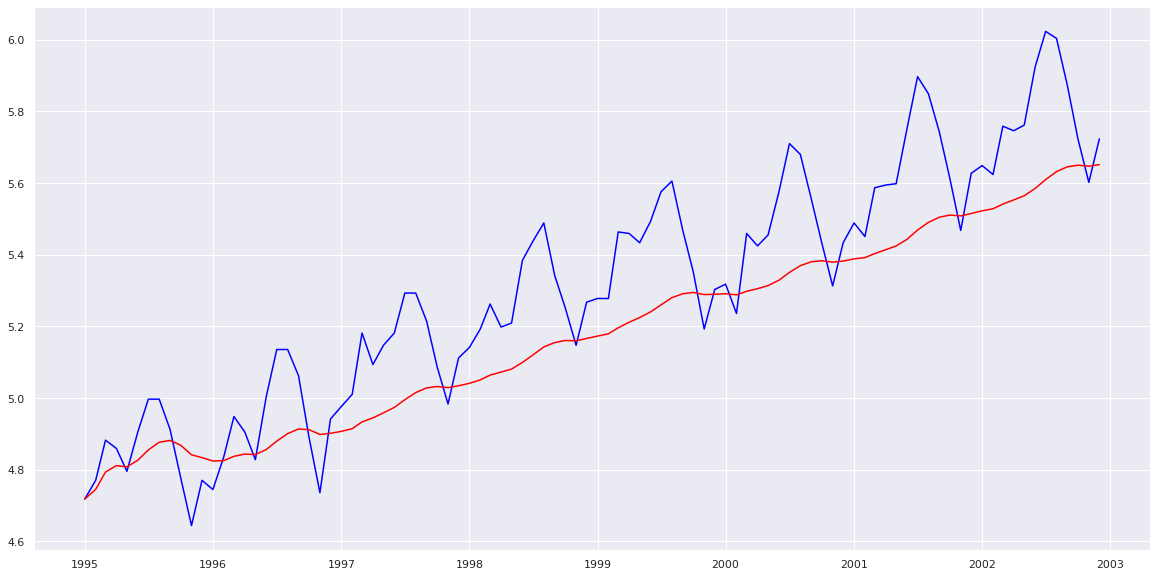

In [ ]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log, color='blue')
plt.plot(exp_data, color='red')

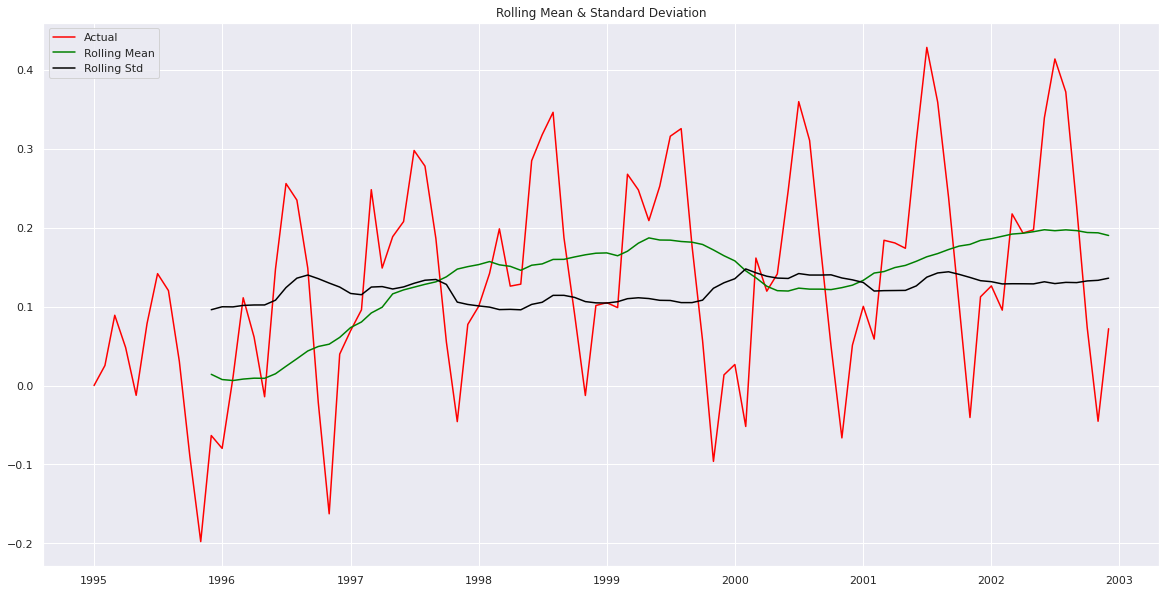

Dickey-Fuller Test: 
Test Statistic          -2.835036
p-value                  0.053441
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


In [ ]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

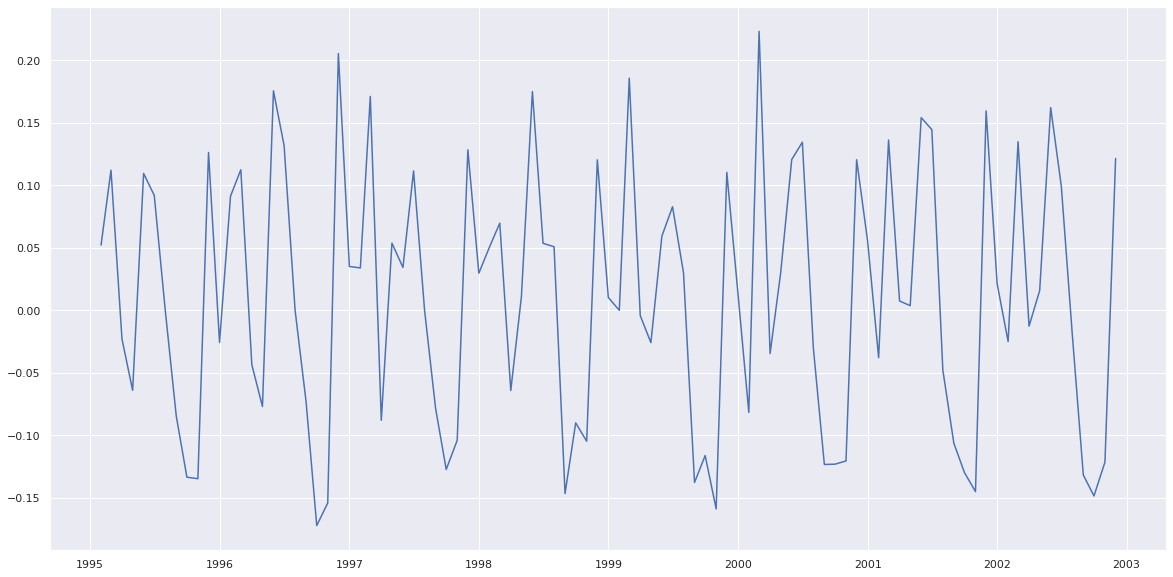

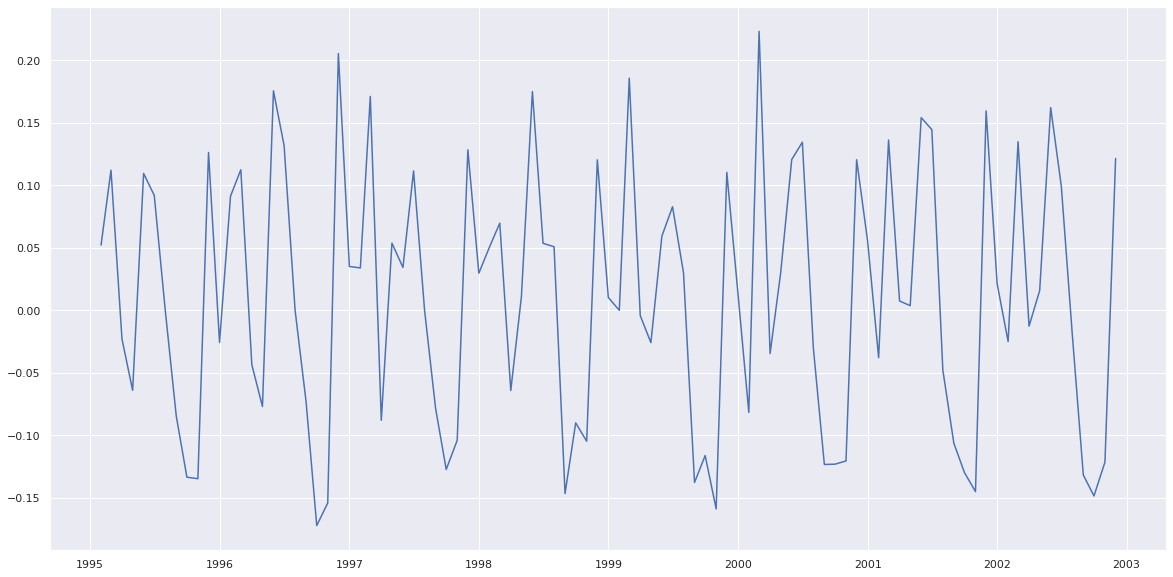

In [ ]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

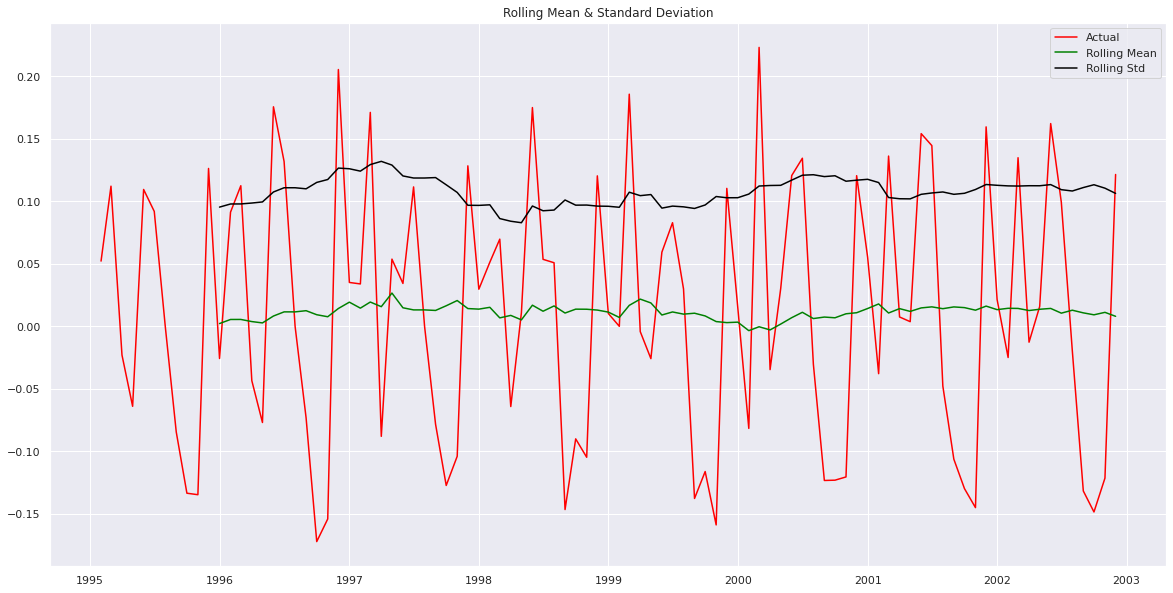

Dickey-Fuller Test: 
Test Statistic          -2.670823
p-value                  0.079225
Lags Used               12.000000
No. of Obs              82.000000
Critical Value (1%)     -3.512738
Critical Value (5%)     -2.897490
Critical Value (10%)    -2.585949
dtype: float64


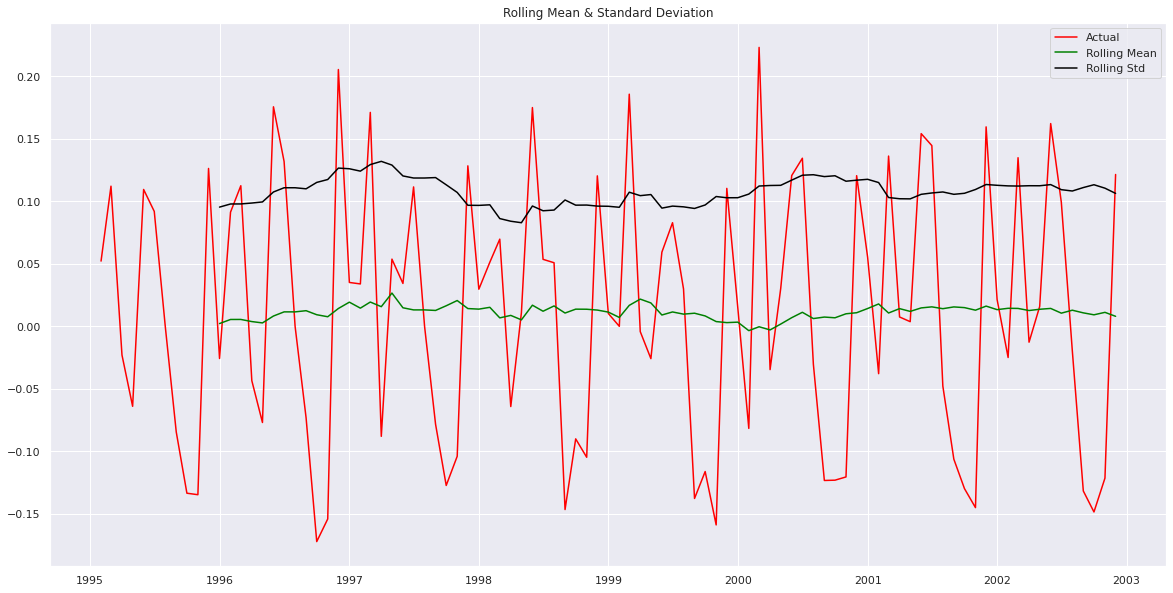

Dickey-Fuller Test: 
Test Statistic          -2.670823
p-value                  0.079225
Lags Used               12.000000
No. of Obs              82.000000
Critical Value (1%)     -3.512738
Critical Value (5%)     -2.897490
Critical Value (10%)    -2.585949
dtype: float64


In [ ]:
data_shift=data_shift.dropna()
stationarity(data_shift)

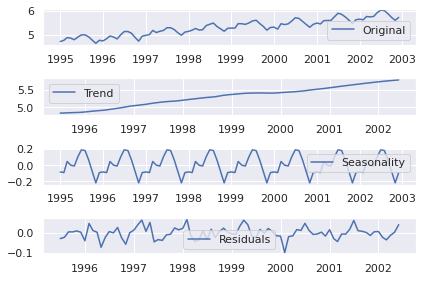

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

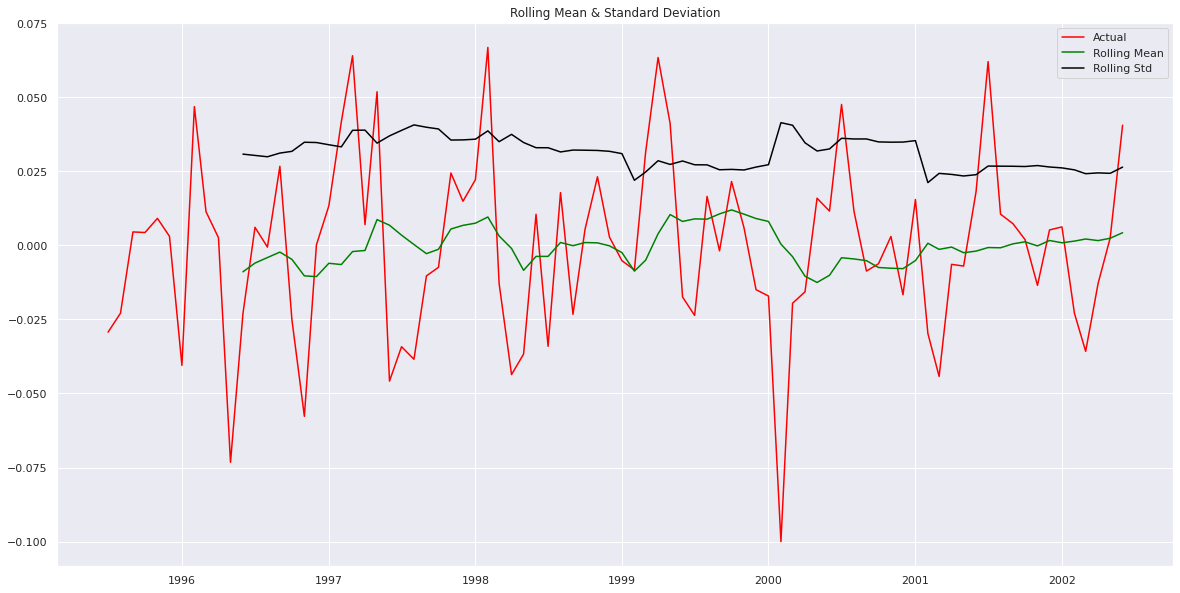

Dickey-Fuller Test: 


KeyError: ignored

In [ ]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

Text(0.5, 1.0, 'Autocorrelation Function')

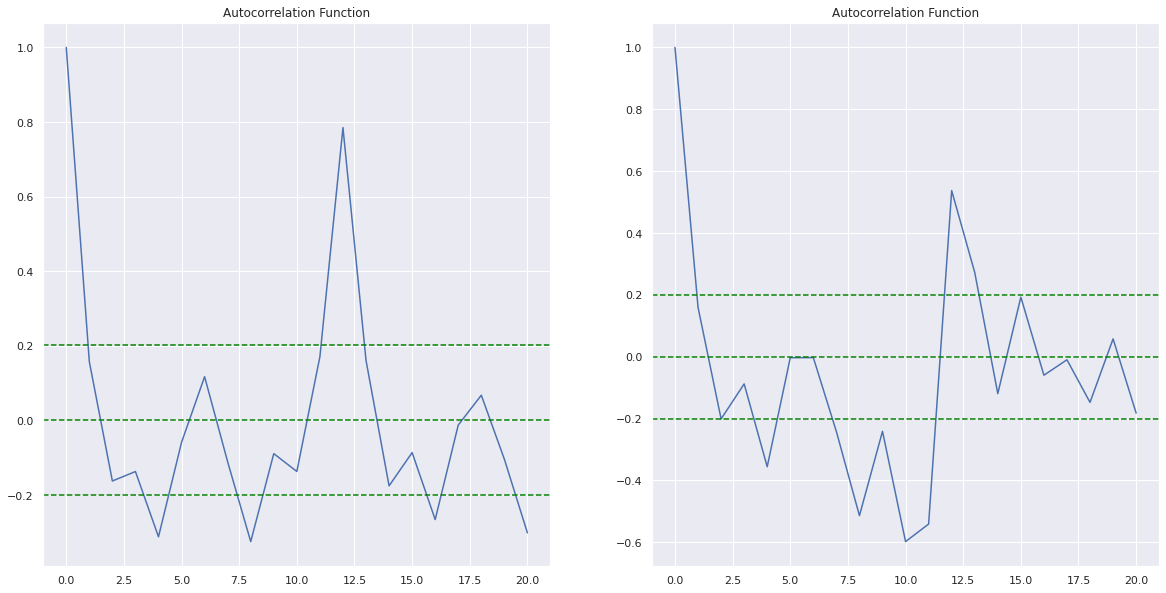

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

ARIMA Model

plotting ARIMA model


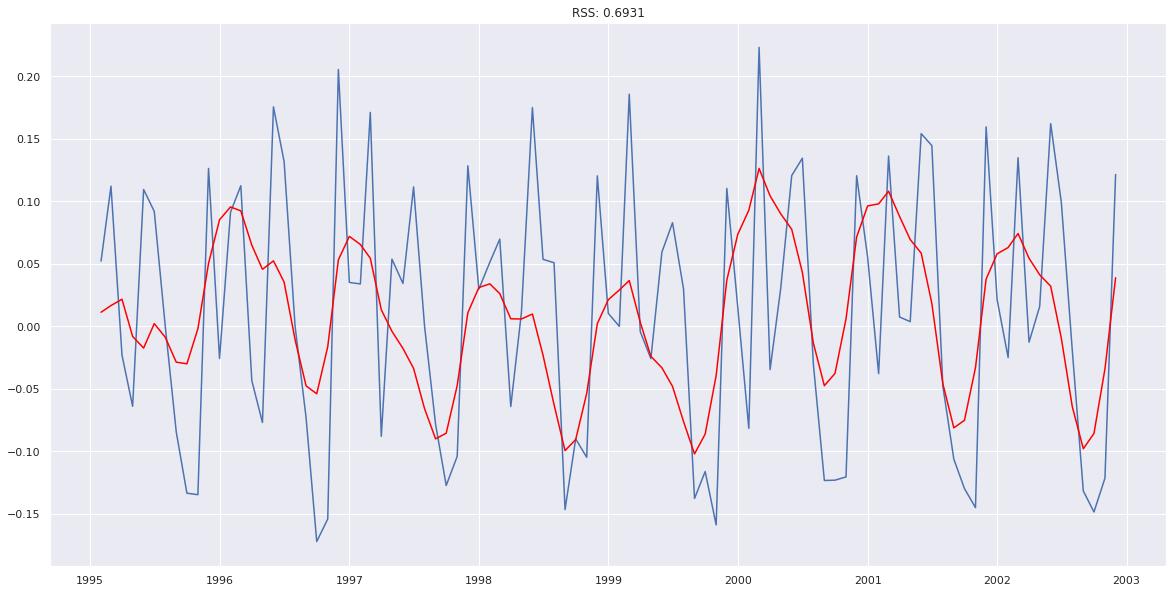

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

In [ ]:
predictions=pd.Series(results.fittedvalues, copy=True)
predictions

Month
1995-02-01    0.011260
1995-03-01    0.016603
1995-04-01    0.021664
1995-05-01   -0.008106
1995-06-01   -0.017403
                ...   
2002-08-01   -0.064432
2002-09-01   -0.097939
2002-10-01   -0.085748
2002-11-01   -0.034012
2002-12-01    0.038829
Length: 95, dtype: float64

In [ ]:
predictions_cum_sum=predictions.cumsum()
predictions_cum_sum

Month
1995-02-01    0.011260
1995-03-01    0.027863
1995-04-01    0.049527
1995-05-01    0.041421
1995-06-01    0.024018
                ...   
2002-08-01    0.952522
2002-09-01    0.854583
2002-10-01    0.768835
2002-11-01    0.734823
2002-12-01    0.773652
Length: 95, dtype: float64

In [ ]:
predictions_log=pd.Series(data_log['Passengers'])
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log

Month
1995-01-01    4.718499
1995-02-01    4.781945
1995-03-01    4.910665
1995-04-01    4.909339
1995-05-01    4.837212
                ...   
2002-08-01    6.956409
2002-09-01    6.726701
2002-10-01    6.492420
2002-11-01    6.336942
2002-12-01    6.497237
Length: 96, dtype: float64

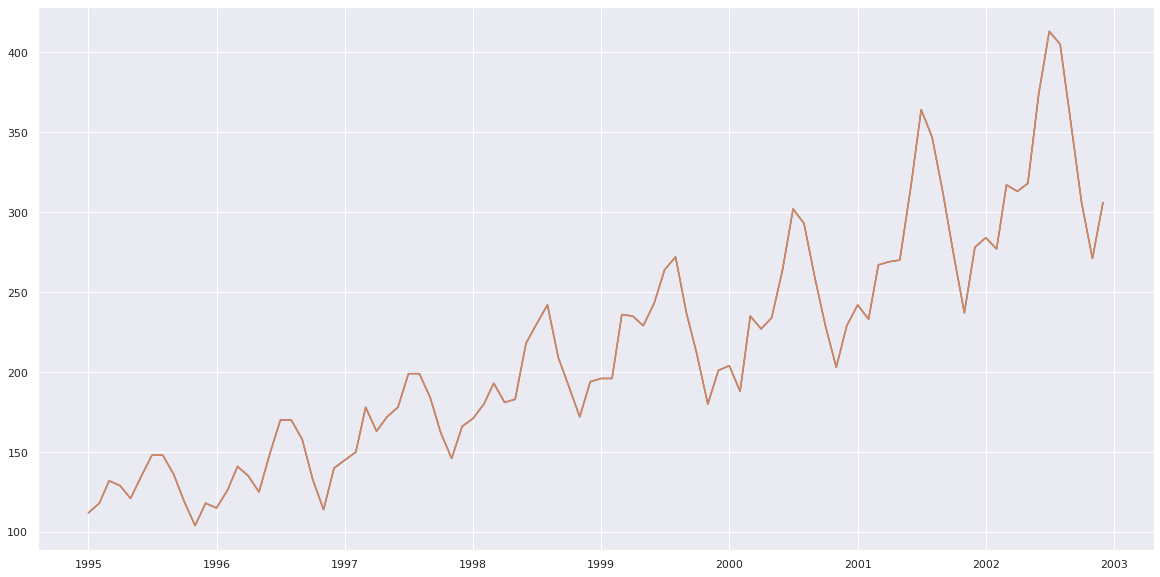

In [ ]:
predictions_ARIMA=np.exp(pd.Series(data_log['Passengers']))
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

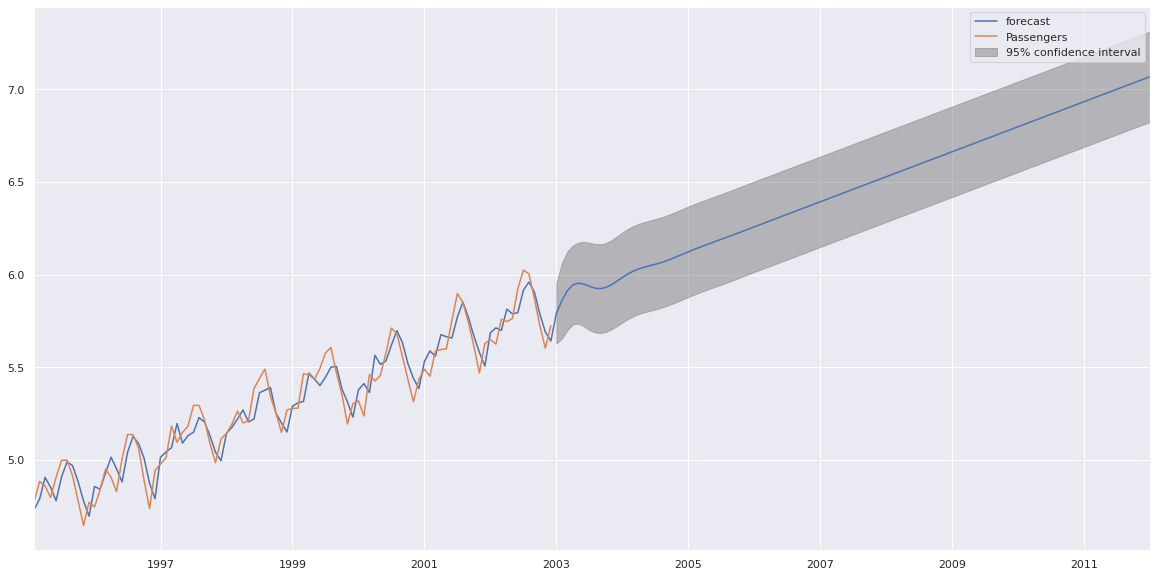

In [ ]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [ ]:
results.forecast(steps=120)

(array([5.79002668, 5.85832233, 5.91212887, 5.94368077, 5.95355305,
        5.948176  , 5.93641823, 5.92644591, 5.92365269, 5.92993617,
        5.94414626, 5.96325406, 5.9837163 , 6.00260186, 6.01823447,
        6.03030789, 6.03958887, 6.0474052 , 6.05512084, 6.06374734,
        6.07376146, 6.08512197, 6.09742555, 6.11011966, 6.12269746,
        6.13482573, 6.14638889, 6.15746039, 6.16822964, 6.17891709,
        6.18970442, 6.20069493, 6.21190675, 6.22329153, 6.23476642,
        6.24624667, 6.25766966, 6.26900614, 6.28025901, 6.29145356,
        6.30262421, 6.31380242, 6.32500878, 6.33625032, 6.34752235,
        6.35881303, 6.37010865, 6.38139795, 6.39267455, 6.4039374 ,
        6.41518953, 6.42643612, 6.43768244, 6.44893235, 6.46018765,
        6.47144815, 6.48271225, 6.49397782, 6.50524289, 6.51650621,
        6.52776733, 6.53902656, 6.55028464, 6.56154242, 6.57280061,
        6.58405958, 6.59531941, 6.60657991, 6.61784074, 6.62910159,
        6.64036222, 6.6516225 , 6.66288247, 6.67